## ABSTRACT


The aim of this assignment is to create an efficient Image Classification model.<br>
The assignment is part of kaggle competition <a href="https://www.kaggle.com/c/dogs-vs-cats">Dogs-vs-Cats</a> to design a image classifier that can effectively classify the image a dog or a cat.

Convolution Neural Network is used to create the model with training accuracy of 96.27% while taking into consideration the following things:
1. Optimal Learning Rate to capture the true feautures.
2. Batch Size to avoid memory overloading.
3. L2 Regularization to avoid overfitting.
4. Dropout rate is strategically set.
5. Model is saved for using it for using the same in future.
6. Tensor flow log file is created.
7. Model snapshot is taken to capture the learning rate.
8. Predictions on test dataset are saved in Output csv file.

### Importing Libraries

In [ ]:
# Importing Libraries
import cv2
import os
import numpy as np
from tqdm import tqdm
from random import shuffle
import pandas as pd

In [2]:
# Variable Declaration Block
train_dir = "DeepLearning/Dataset/dogs-vs-cats/train"
test_dir = "DeepLearning/Dataset/dogs-vs-cats/test"
lr = 1e-4
img_size = 100
model_name = 'dogsvscats-{}-{}.model'.format(lr,'6conv-basic')

In [48]:
# Function to assign labels to the images
def label_img(img):
    """
    Assigning cat/dog label to the image
    """
    word_label=img.split('.')[-3]
    if word_label == 'cat':
        return [1,0]
    elif word_label == 'dog':
        return [0,1]

In [50]:
# Function to create the training data
def create_train_data():
    """
    Function to read the images from the directory
    It will convert the images to grayscale to remove noise
    """
    training_data = []
    for img in tqdm(os.listdir(train_dir)):
        label = label_img(img)
        path = os.path.join(train_dir,img)
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (img_size,img_size))
        training_data.append([np.array(img),np.array(label)])
    shuffle(training_data)
    np.save('train_data.npy', training_data)
    return training_data

In [51]:
# Function to create the training data
def process_testing_data():
    """
    Function to read the images from the directory
    It will convert the images to grayscale to remove noise
    """
    testing_data = []
    for img in tqdm(os.listdir(test_dir)):
        path = os.path.join(test_dir,img)
        img_num = img.split('.')[0]
        img = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE),(img_size,img_size))
        testing_data.append([np.array(img),img_num])
    np.save('test_data.npy',testing_data)
    return testing_data

In [6]:
train_data = create_train_data()

100%|██████████| 25000/25000 [01:07<00:00, 370.31it/s]


create_train_data function is called to load the training set to the list tarin_data

### Designing Neural Network Model

In [7]:
# Designing the Convolution Neural Network Model

import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import tflearn.datasets.mnist as mnist

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, img_size, img_size, 1], name='input')

convnet = conv_2d(convnet, 32, 2, activation='relu', regularizer="L2")
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 64, 2, activation='relu', regularizer="L2")
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 128, 2, activation='relu', regularizer="L2")
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 256, 2, activation='relu', regularizer="L2")
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu', regularizer="L2")
convnet = max_pool_2d(convnet, 2)

convnet = conv_2d(convnet, 512, 2, activation='relu', regularizer="L2")
convnet = max_pool_2d(convnet, 2)

convnet = fully_connected(convnet, 1024, activation='relu', regularizer="L2")
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=lr, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


In [8]:
# Check to see if model already exist in the directory
if os.path.exists('{}.meta'.format(model_name)):
    model.load(model_name)
    print('Model Loaded')

In [9]:
# Keeping the 500 files for validation purpose to calculate the accuracy on the validation dataset
train = train_data[:-500]
valid = train_data[-500:]

In [10]:
X = np.array([i[0] for i in train]).reshape(-1,img_size, img_size, 1)
Y = [i[1] for i in train]

valid_x = np.array([i[0] for i in valid]).reshape(-1,img_size, img_size, 1)
valid_y = [i[1] for i in valid]

Here, we have specified -1 to include everything and 1 is mentioned to indicate that the imgaes are grayscale images. <br/>
1 -> Grayscale Images<br/>
3 -> Colored(RGB) Images

### Training the Model

In [11]:
# Fitting the model against the training dataset
model.fit({'input': X}, {'targets': Y}, n_epoch=10, validation_set=({'input': valid_x}, {'targets': valid_y}), 
    snapshot_step=500, show_metric=True, run_id=model_name)

Training Step: 3829  | total loss: 0.12397 | time: 356.578s
| Adam | epoch: 010 | loss: 0.12397 - acc: 0.9620 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.11792 | time: 359.217s
| Adam | epoch: 010 | loss: 0.11792 - acc: 0.9627 | val_loss: 0.49904 - val_acc: 0.8500 -- iter: 24500/24500
--


### Saving the Model

In [12]:
# Saving the model for future refernce
model.save(model_name)

INFO:tensorflow:/Users/sarthakgoel/Desktop/Courses/Machine Learning/dogsvscats-0.0001-6conv-basic.model is not in all_model_checkpoint_paths. Manually adding it.


### Predictions against the test set

100%|██████████| 12500/12500 [00:37<00:00, 336.68it/s]


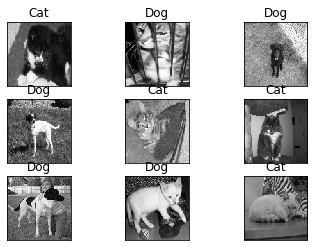

In [16]:
# Plotting the subset the predicted images with their corresponding predicted labels
import matplotlib.pyplot as plt
plt.figure

test_data = process_testing_data()

fig = plt.figure()

for num, data in enumerate(test_data[:9]):
    img_num = data[1]
    img_data = data[0]
    y = fig.add_subplot(3,3,num+1)
    orig = img_data
    data = img_data.reshape(img_size, img_size, 1)
    
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_label='Dog'
    else: 
        str_label = 'Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

We have taken the sample 9 images from the test dataset.<br/>
We can see that the model is highly effecient as it is able to differentiate between a cat and a dog.

In [28]:
#Creating the submission-file.csv file
with open('submission-file.csv','w') as f:
    f.write("id,label\n")

In [29]:
with open('submission-file.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(img_size, img_size, 1)
        model_out = model.predict([data])[0]
        f.write('{},{}\n'.format(img_num, model_out[1]))

100%|██████████| 12500/12500 [01:01<00:00, 202.54it/s]


Saving the submission-file.csv in the directory.<br/>
The files contains the test image id and the corresponding model probablity.

In [30]:
# Creating the submission-file.csv file
with open('output.csv','w') as f:
    f.write("id,probablity,label\n")

In [31]:
with open('output.csv','a') as f:
    for data in tqdm(test_data):
        img_num = data[1]
        img_data = data[0]
        orig = img_data
        data = img_data.reshape(img_size, img_size, 1)
        model_out = model.predict([data])[0]
        f.write('{},{},{}\n'.format(img_num, model_out[1],round(model_out[1])))

100%|██████████| 12500/12500 [00:56<00:00, 220.81it/s]


A threshold of 0.5 is taken into consideration. If the [predicticted probablity] > 0.5 then label=1 i.e. 'Dog' else if <0.5 then label=0 i.e. 'Cat'<br/>
Saving the output.csv in the directory.<br/>
The files contains the test image id and the corresponding model probablity.

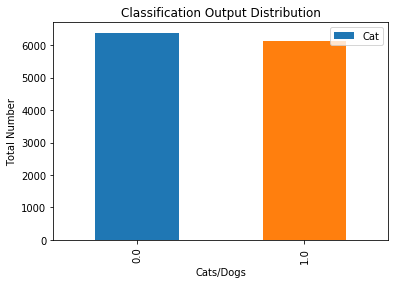

In [47]:
result = pd.read_csv('output.csv')
result['label'].value_counts().plot.bar()
cate = ['Cat','Dog']
plt.title("Classification Output Distribution")
plt.ylabel('Total Number')
plt.xlabel('Cats/Dogs')
plt.legend(cate,loc=1)

Based on the predictions, we can see predicted categories of Dogs & Cats are equally likely to be same.
Hence it denotes the effectiveness of the model.

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(valid_x)
y_class = np.argmax(y_pred, axis = 1) 
y_check = np.argmax(valid_y, axis = 1) 

cmatrix = confusion_matrix(y_check, y_class)
print(cmatrix)

accuracy = accuracy_score(y_check, y_class)
print(accuracy*100)

[[223  27]
 [ 48 202]]
85.0


## SUMMARY

Initially the entire dataset of images is read and rescaled after being converted to grayscale 2D arrays.

Training data is split into train_data and validation data. Model training is done on train_data and model is validated on validation data and predictions are made on test data.

Multiple models were employed to get the most optimal learning rate.

Neural Network model is designed and L2 regularization is added in each hidden lauyer to avoid overfitting.

Optimal weights are added to the CNN so that the overall model does not become complex.
Futher, Dropout is added in order to avoid the overfitting problems.

Relu activation function is used while categorical_crossentropy is the cost function and optimizer used is adam.

Model is saved to the local directory fopr future reference as we can make use of load_model() instead of making a fresh new model everytime we run the notebook.

Upon Training the model we got the high accuracy of ~96% in 10 epochs, since I was getting the memory overloadingn issue so default batch_size is used.

While tarining the model, snapshot of model is taken per 500 steps to capture the training rate.

Predictions are made against the test data and prediction results are saved in 2 files : 'submission-file.csv' & 'output.csv'.

A threshold of 0.5 is taken into consideration to correctly labels the predictions. If predicted probablity is >0.5 then dog label is assigned else cat label is assigned.

We can see from the bar plot that predictions are pretty correct with slight error as 6382 images are classified as Cats and 6118 are classified as dogs out of 12500 test images.


## CONCLUSION

There is enormous diversity in the testing database (a wide variety of backgrounds, angles, poses, lighting, etc.) and the model is making accurate automatic classification between cat & dog.<br>
Hence, we can conclude that the model is higly effecient by looking at the accuracy.
We achieved ~96% training accuracy while the validation accuracy was ~85%.
The model also avoids the issues like overfitting and underfitting.

## CONTRIBUTIONS

20% is derived from the existing kernel and the remaining 80% is completed by my own.<br>
1. Multiple models are designed to find the most optimal Learning Rate to capture the true feautures.
2. Small Batch Size to avoid memory overloading.
3. L2 Regularization to avoid overfitting and Dropout rate is strategically set by employing Hit/Trial technique.
4. Model is saved for using it for using the same in future.
5. Tensor flow log file is created.
6. Predictions on test dataset are saved in Output csv file with the corresponding predicted probablities.

## CITATIONS

1. <a href="https://www.kaggle.com/uysimty/keras-cnn-dog-or-cat-classification"> Existing Kernel </a>
2. <a href="https://www.edureka.co/blog/neural-network-tutorial/"> Neural Network Tutorial </a>
3. <a href="https://towardsdatascience.com/preventing-deep-neural-network-from-overfitting-953458db800a"> Overfitting in CNN</a>
4. <a href="http://tflearn.org/models/dnn/">Tensor Flow Repository</a>
5. <a href="https://pythonprogramming.net/convolutional-neural-network-kats-vs-dogs-machine-learning-tutorial/">Classification</a>

## LICENSE

MIT Licence
Copyright 2019 Sarthak Goel

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions: The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.<br> THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.